In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.transformer import GPT
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset

In [2]:
N = 4
block_size  = 2
embed_size  = 6
hidden_size = 10
attn_hidden_size = 10
output_size = 3
num_heads   = 3
vocab_size  = 3
num_transformer_blocks = 2

log_interval = 10
epochs = 5
learning_rate = 1e-4
device = torch.device('cpu')

In [3]:
# #block size 1
# data = "".join(["abca"]*1000)

In [4]:
# block size 2
data = "".join(["aabcacb"]*1000)

In [5]:
dataset = CharDataset(data=data, block_size=block_size)
dataset[0]

(tensor([0, 0]), tensor([0, 1]))

In [6]:
net = GPT(vocab_size=vocab_size, 
          block_size=block_size,
          embed_size=embed_size,
          hidden_size=hidden_size,
          attn_hidden_size=attn_hidden_size,
          output_size=output_size,
          num_transformer_blocks=num_transformer_blocks,
          num_heads=num_heads)

In [7]:
x = dataset[0][0].view(1,-1)

In [8]:
x

tensor([[0, 0]])

In [9]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    return loss(o.view(-1,vocab_size),y.view(-1))

In [10]:
trainer = Trainer(model=net, 
                  dataset=dataset, 
                  loss_fn=loss_fn, 
                  batch_size=N, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device)

In [11]:
trainer.run()

Train Epoch: 0 [0/6998 (0%)]	Loss: 1.164870
Train Epoch: 0 [40/6998 (1%)]	Loss: 0.976067
Train Epoch: 0 [80/6998 (1%)]	Loss: 1.182954
Train Epoch: 0 [120/6998 (2%)]	Loss: 1.676910
Train Epoch: 0 [160/6998 (2%)]	Loss: 1.277289
Train Epoch: 0 [200/6998 (3%)]	Loss: 0.938357
Train Epoch: 0 [240/6998 (3%)]	Loss: 1.098916
Train Epoch: 0 [280/6998 (4%)]	Loss: 1.409909
Train Epoch: 0 [320/6998 (5%)]	Loss: 1.021109
Train Epoch: 0 [360/6998 (5%)]	Loss: 1.310106
Train Epoch: 0 [400/6998 (6%)]	Loss: 1.019157
Train Epoch: 0 [440/6998 (6%)]	Loss: 1.290685
Train Epoch: 0 [480/6998 (7%)]	Loss: 1.204453
Train Epoch: 0 [520/6998 (7%)]	Loss: 1.004164
Train Epoch: 0 [560/6998 (8%)]	Loss: 1.078562
Train Epoch: 0 [600/6998 (9%)]	Loss: 0.930712
Train Epoch: 0 [640/6998 (9%)]	Loss: 1.246014
Train Epoch: 0 [680/6998 (10%)]	Loss: 1.215343
Train Epoch: 0 [720/6998 (10%)]	Loss: 1.234234
Train Epoch: 0 [760/6998 (11%)]	Loss: 0.997418
Train Epoch: 0 [800/6998 (11%)]	Loss: 1.089979
Train Epoch: 0 [840/6998 (12%)]	Lo

Train Epoch: 0 [6960/6998 (99%)]	Loss: 0.629316
Train Epoch: 1 [0/6998 (0%)]	Loss: 0.552147
Train Epoch: 1 [40/6998 (1%)]	Loss: 0.479165
Train Epoch: 1 [80/6998 (1%)]	Loss: 0.802287
Train Epoch: 1 [120/6998 (2%)]	Loss: 0.836966
Train Epoch: 1 [160/6998 (2%)]	Loss: 0.666834
Train Epoch: 1 [200/6998 (3%)]	Loss: 0.783670
Train Epoch: 1 [240/6998 (3%)]	Loss: 0.830988
Train Epoch: 1 [280/6998 (4%)]	Loss: 0.505660
Train Epoch: 1 [320/6998 (5%)]	Loss: 0.662347
Train Epoch: 1 [360/6998 (5%)]	Loss: 0.389762
Train Epoch: 1 [400/6998 (6%)]	Loss: 0.632273
Train Epoch: 1 [440/6998 (6%)]	Loss: 0.637392
Train Epoch: 1 [480/6998 (7%)]	Loss: 0.541895
Train Epoch: 1 [520/6998 (7%)]	Loss: 0.679229
Train Epoch: 1 [560/6998 (8%)]	Loss: 0.493605
Train Epoch: 1 [600/6998 (9%)]	Loss: 0.614778
Train Epoch: 1 [640/6998 (9%)]	Loss: 0.751640
Train Epoch: 1 [680/6998 (10%)]	Loss: 0.603550
Train Epoch: 1 [720/6998 (10%)]	Loss: 0.474597
Train Epoch: 1 [760/6998 (11%)]	Loss: 0.591762
Train Epoch: 1 [800/6998 (11%)]	L

Train Epoch: 1 [6920/6998 (99%)]	Loss: 0.565316
Train Epoch: 1 [6960/6998 (99%)]	Loss: 0.362323
Train Epoch: 2 [0/6998 (0%)]	Loss: 0.492368
Train Epoch: 2 [40/6998 (1%)]	Loss: 0.817412
Train Epoch: 2 [80/6998 (1%)]	Loss: 0.682314
Train Epoch: 2 [120/6998 (2%)]	Loss: 0.439763
Train Epoch: 2 [160/6998 (2%)]	Loss: 0.517204
Train Epoch: 2 [200/6998 (3%)]	Loss: 0.674175
Train Epoch: 2 [240/6998 (3%)]	Loss: 0.509048
Train Epoch: 2 [280/6998 (4%)]	Loss: 0.547518
Train Epoch: 2 [320/6998 (5%)]	Loss: 0.666714
Train Epoch: 2 [360/6998 (5%)]	Loss: 0.368286
Train Epoch: 2 [400/6998 (6%)]	Loss: 0.704893
Train Epoch: 2 [440/6998 (6%)]	Loss: 0.666713
Train Epoch: 2 [480/6998 (7%)]	Loss: 0.527406
Train Epoch: 2 [520/6998 (7%)]	Loss: 0.344902
Train Epoch: 2 [560/6998 (8%)]	Loss: 0.437030
Train Epoch: 2 [600/6998 (9%)]	Loss: 0.488922
Train Epoch: 2 [640/6998 (9%)]	Loss: 0.548123
Train Epoch: 2 [680/6998 (10%)]	Loss: 0.514001
Train Epoch: 2 [720/6998 (10%)]	Loss: 0.689408
Train Epoch: 2 [760/6998 (11%)]	

Train Epoch: 2 [6920/6998 (99%)]	Loss: 0.369892
Train Epoch: 2 [6960/6998 (99%)]	Loss: 0.523778
Train Epoch: 3 [0/6998 (0%)]	Loss: 0.391706
Train Epoch: 3 [40/6998 (1%)]	Loss: 0.510640
Train Epoch: 3 [80/6998 (1%)]	Loss: 0.683191
Train Epoch: 3 [120/6998 (2%)]	Loss: 0.496328
Train Epoch: 3 [160/6998 (2%)]	Loss: 0.759386
Train Epoch: 3 [200/6998 (3%)]	Loss: 0.355340
Train Epoch: 3 [240/6998 (3%)]	Loss: 0.544266
Train Epoch: 3 [280/6998 (4%)]	Loss: 0.637751
Train Epoch: 3 [320/6998 (5%)]	Loss: 0.511113
Train Epoch: 3 [360/6998 (5%)]	Loss: 0.627497
Train Epoch: 3 [400/6998 (6%)]	Loss: 0.535129
Train Epoch: 3 [440/6998 (6%)]	Loss: 0.379118
Train Epoch: 3 [480/6998 (7%)]	Loss: 0.354874
Train Epoch: 3 [520/6998 (7%)]	Loss: 0.472368
Train Epoch: 3 [560/6998 (8%)]	Loss: 0.566041
Train Epoch: 3 [600/6998 (9%)]	Loss: 0.716577
Train Epoch: 3 [640/6998 (9%)]	Loss: 0.458756
Train Epoch: 3 [680/6998 (10%)]	Loss: 0.698698
Train Epoch: 3 [720/6998 (10%)]	Loss: 0.346046
Train Epoch: 3 [760/6998 (11%)]	

Train Epoch: 3 [6880/6998 (98%)]	Loss: 0.475058
Train Epoch: 3 [6920/6998 (99%)]	Loss: 0.554497
Train Epoch: 3 [6960/6998 (99%)]	Loss: 0.525091
Train Epoch: 4 [0/6998 (0%)]	Loss: 0.385606
Train Epoch: 4 [40/6998 (1%)]	Loss: 0.377417
Train Epoch: 4 [80/6998 (1%)]	Loss: 0.492438
Train Epoch: 4 [120/6998 (2%)]	Loss: 0.359395
Train Epoch: 4 [160/6998 (2%)]	Loss: 0.538840
Train Epoch: 4 [200/6998 (3%)]	Loss: 0.637839
Train Epoch: 4 [240/6998 (3%)]	Loss: 0.549832
Train Epoch: 4 [280/6998 (4%)]	Loss: 0.696725
Train Epoch: 4 [320/6998 (5%)]	Loss: 0.521904
Train Epoch: 4 [360/6998 (5%)]	Loss: 0.486827
Train Epoch: 4 [400/6998 (6%)]	Loss: 0.612080
Train Epoch: 4 [440/6998 (6%)]	Loss: 0.535515
Train Epoch: 4 [480/6998 (7%)]	Loss: 0.446756
Train Epoch: 4 [520/6998 (7%)]	Loss: 0.610252
Train Epoch: 4 [560/6998 (8%)]	Loss: 0.473300
Train Epoch: 4 [600/6998 (9%)]	Loss: 0.573529
Train Epoch: 4 [640/6998 (9%)]	Loss: 0.666026
Train Epoch: 4 [680/6998 (10%)]	Loss: 0.389094
Train Epoch: 4 [720/6998 (10%)]

Train Epoch: 4 [6880/6998 (98%)]	Loss: 0.526573
Train Epoch: 4 [6920/6998 (99%)]	Loss: 0.362954
Train Epoch: 4 [6960/6998 (99%)]	Loss: 0.380229


In [12]:
x = dataset[0][0].view(1,-1)

o = net(x)

In [13]:
torch.nn.functional.softmax(o[0], dim=1)

tensor([[0.2878, 0.5033, 0.2089],
        [0.2878, 0.5033, 0.2089]], grad_fn=<SoftmaxBackward0>)

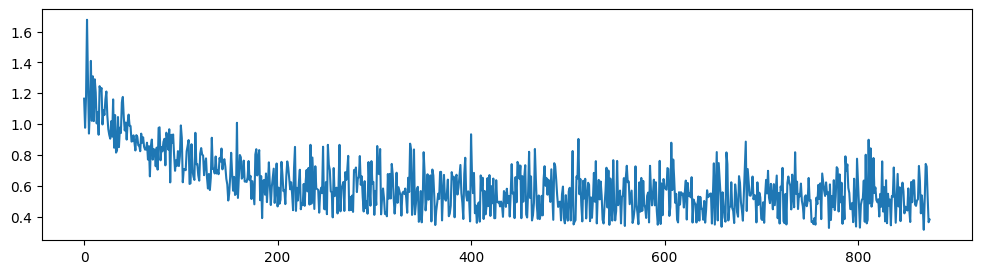

In [14]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()